In [1]:
import numpy as np
import os
import sys
import json
import pickle
import matplotlib.pyplot as plt

# Switch to parent path to import local module
parent_path = str(os.getcwd()).split('notebooks')[0] # zeosyn_gen
os.chdir(parent_path)
print('Switched directory to:', os.getcwd())

import data.utils as utils
sys.modules['utils'] = utils # Way to get around relative imports in utils for ZeoSynGen_dataset # https://stackoverflow.com/questions/2121874/python-pickling-after-changing-a-modules-directory
from eval import load_model, get_prediction_and_ground_truths, eval_zeolite_aggregated, eval_zeolite_osda, eval_single_system, get_metric_dataframes
from data.metrics import maximum_mean_discrepancy, wasserstein_distance

Switched directory to: /home/jupyter/Elton/Zeolites/zeosyn_gen


/home/synthesisproject/anaconda3/envs/zeo_diffusion_metrics/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/synthesisproject/anaconda3/envs/zeo_diffusion_metrics/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_type = 'gan'
fname = 'v0'
split = 'system'

In [3]:
# Load configs
with open(f'runs/{model_type}/{split}/{fname}/configs.json') as f:
    configs = json.load(f)
with open(f"runs/{model_type}/{split}/{fname}/g_train_loss_list.pkl", 'rb') as f: # load dataset
    g_train_loss_list = pickle.load(f)
with open(f"runs/{model_type}/{split}/{fname}/g_val_loss_list.pkl", 'rb') as f: # load dataset
    g_val_loss_list = pickle.load(f)
with open(f"runs/{model_type}/{split}/{fname}/d_train_loss_list.pkl", 'rb') as f: # load dataset
    d_train_loss_list = pickle.load(f)
with open(f"runs/{model_type}/{split}/{fname}/d_val_loss_list.pkl", 'rb') as f: # load dataset
    d_val_loss_list = pickle.load(f)

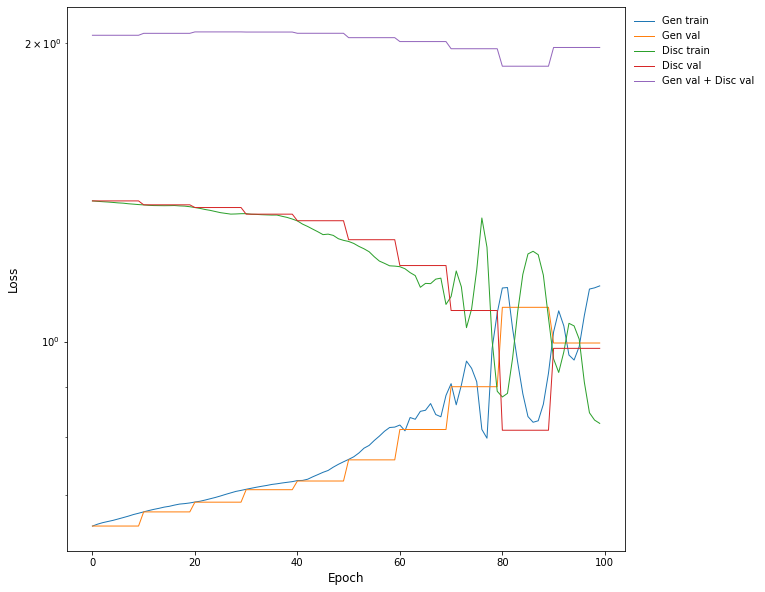

In [11]:
# Train/val loss fig
plt.figure(figsize=(10,10))
plt.plot(range(len(g_train_loss_list)), g_train_loss_list, label = 'Gen train')
plt.plot(range(len(g_val_loss_list)), g_val_loss_list, label = 'Gen val')
plt.plot(range(len(d_train_loss_list)), d_train_loss_list, label = 'Disc train')
plt.plot(range(len(d_val_loss_list)), d_val_loss_list, label = 'Disc val')
plt.plot(range(len(d_val_loss_list)), np.array(d_val_loss_list) + np.array(g_val_loss_list), label = 'Gen val + Disc val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
# plt.ylim(0,1.1*train_loss_list[0])
plt.show()

In [5]:
# Get predictions and ground truths
model, configs = load_model(model_type, fname, split)
syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset = get_prediction_and_ground_truths(model, configs)
mmd_zeo_agg_df, wsd_zeo_agg_df, mmd_zeo_osda_df, wsd_zeo_osda_df = get_metric_dataframes(configs)

Loading model and configs...
Getting model predictions and grouth truths...
SYSTEMS:
train+val: 1856 test: 464

n_datapoints:
train: 14749 val: 2107 test: 5168
Loading synthetic predictions from saved predictions...


# 1) Overall aggregated

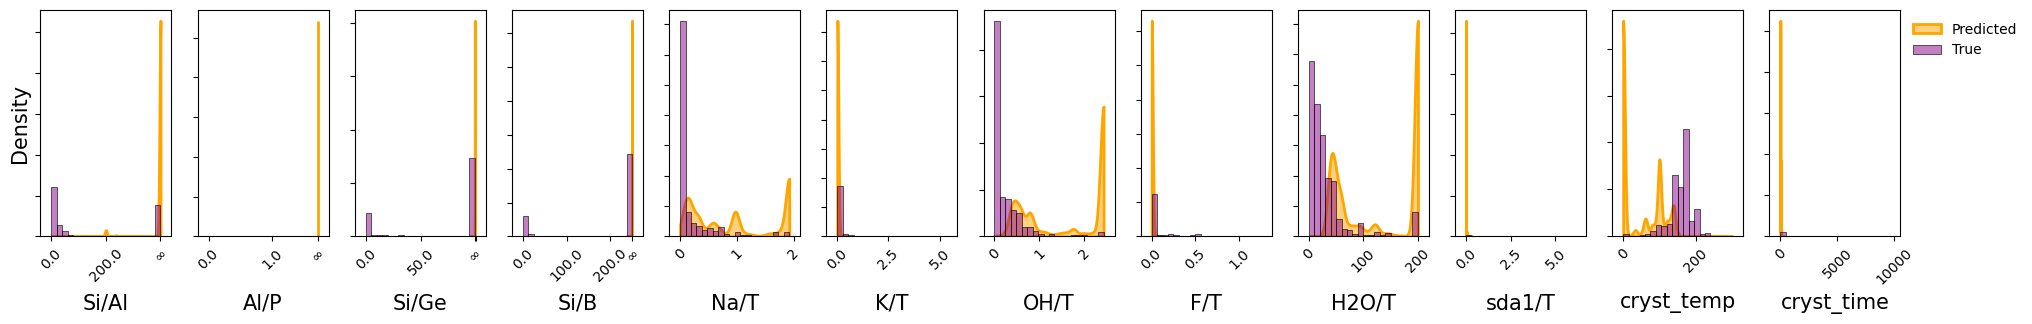

In [6]:
utils.compare_gel_conds([syn_pred, syn_true], ['Predicted', 'True'], [True, False], [False, True], ['orange', 'darkmagenta'], common_norm=True, alpha=0.5)

# 2) System-splits

### A) Zeolite-aggregated systems

Calculating metrics for zeolite-aggregated systems...
CHA
MMD: 2.0904808044433594
WSD: 1.013980847763127


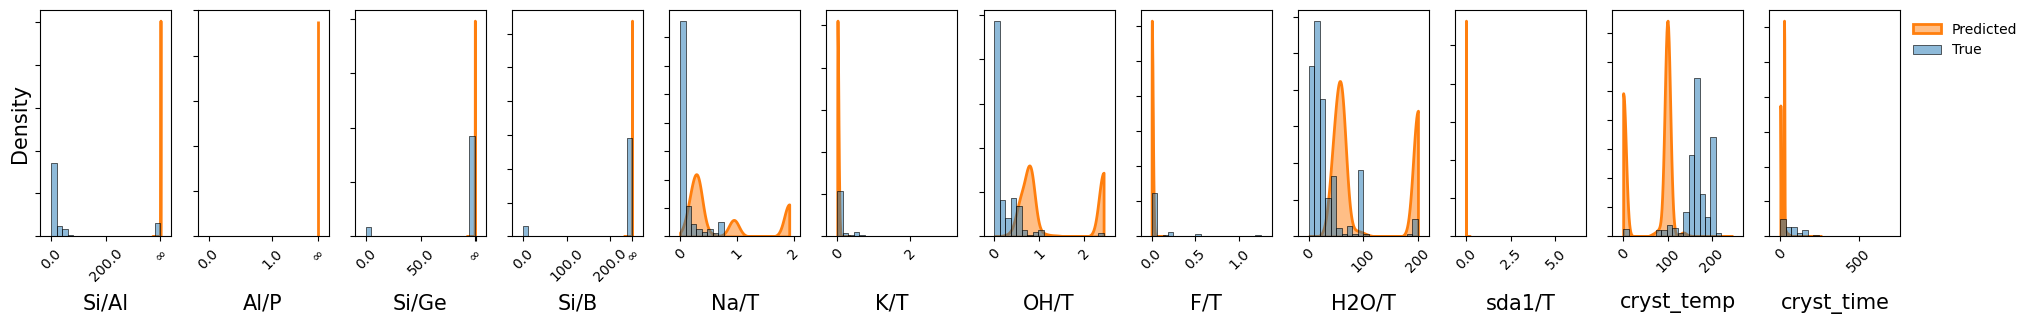

AEL
MMD: 3.008787155151367
WSD: 0.8534991288703904


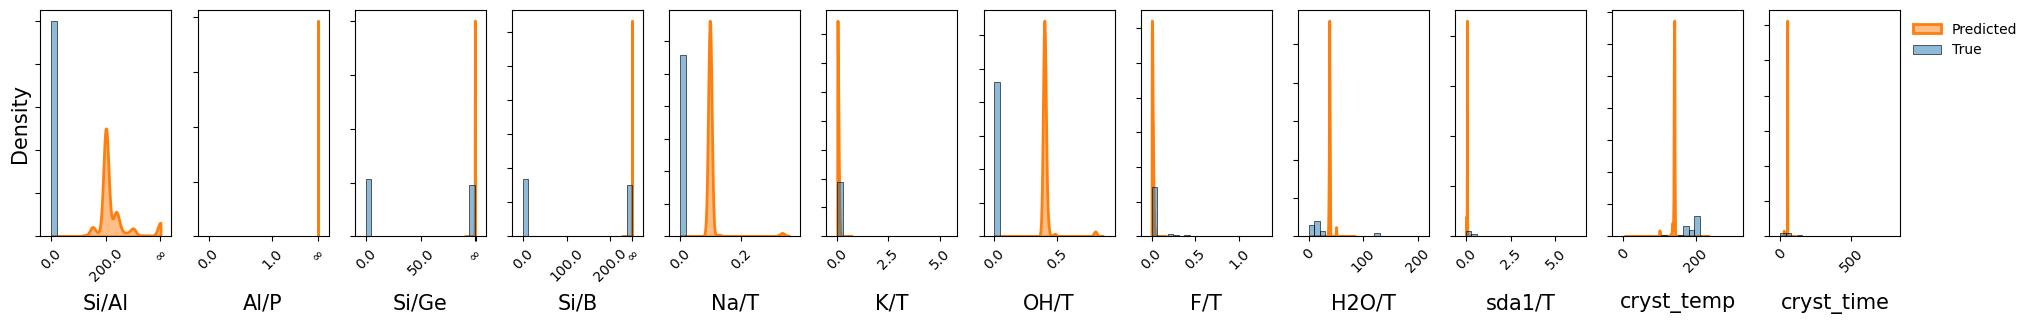

MFI
MMD: 3.139911651611328
WSD: 1.3331786070287024


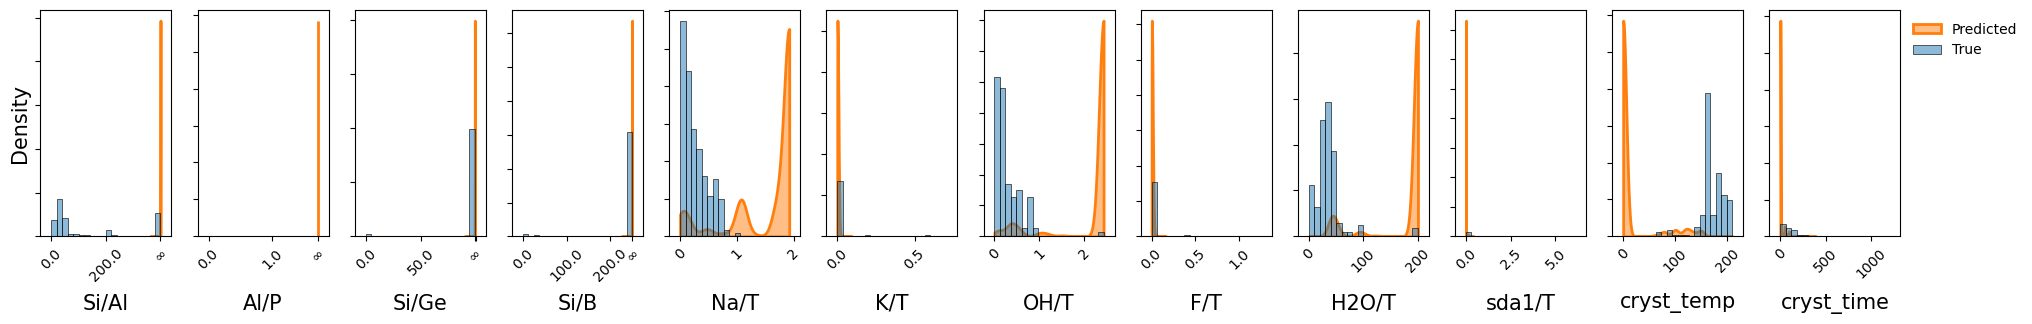

LTA
MMD: 3.4959068298339844
WSD: 1.9533214981240112


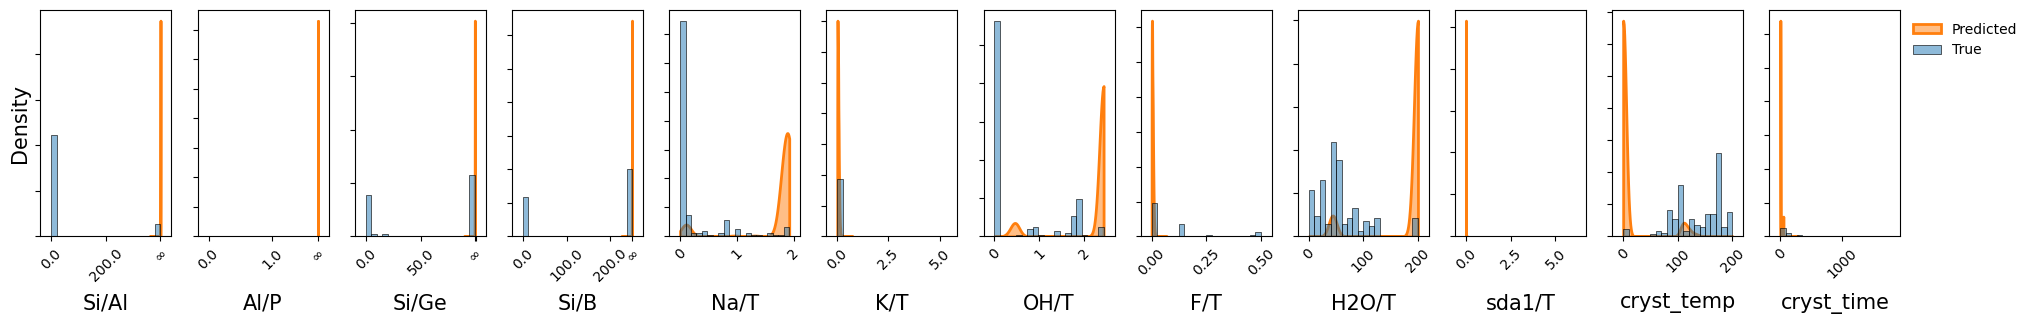

AFI
MMD: 3.0680785179138184
WSD: 1.508924670952671


LinAlgError: singular matrix

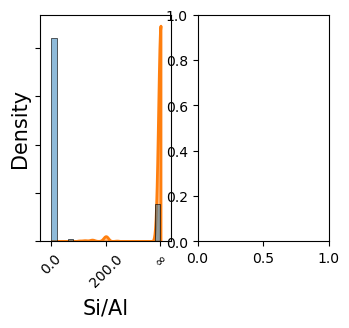

In [7]:
_, _ = eval_zeolite_aggregated(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, configs, eval=True, plot=True, print_metrics=True, num_systems=10)

SAV
MMD: 3.753060817718506
WSD: 0.8355118445338807


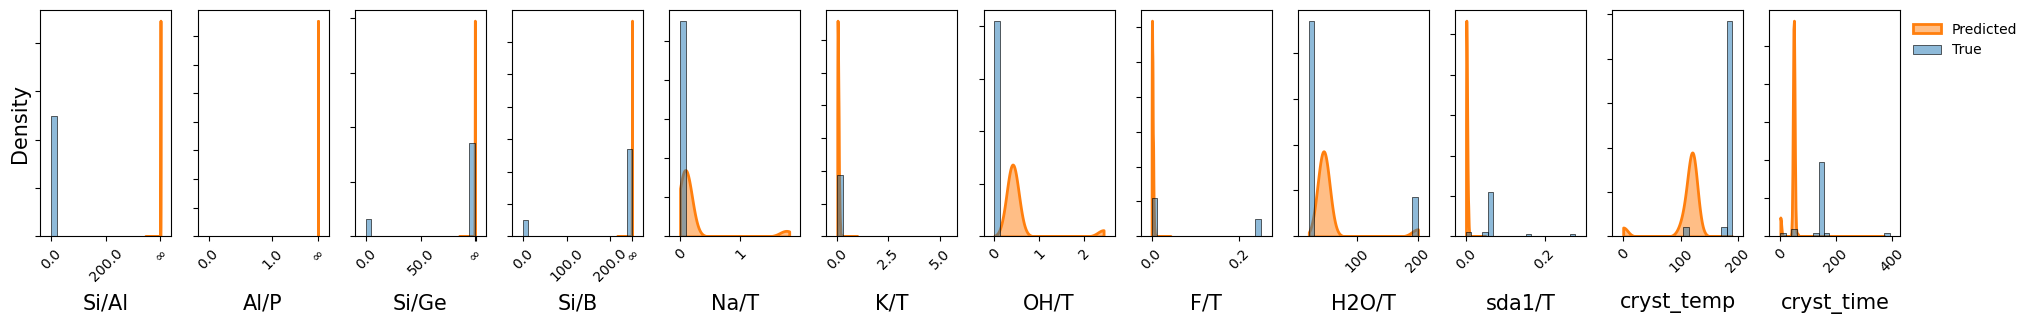

In [8]:
eval_single_system(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, mmd_zeo_agg_df, wsd_zeo_agg_df, mmd_zeo_osda_df, wsd_zeo_osda_df, zeo='SAV')

BEC
MMD: 3.6739091873168954
WSD: 2.070388509442788


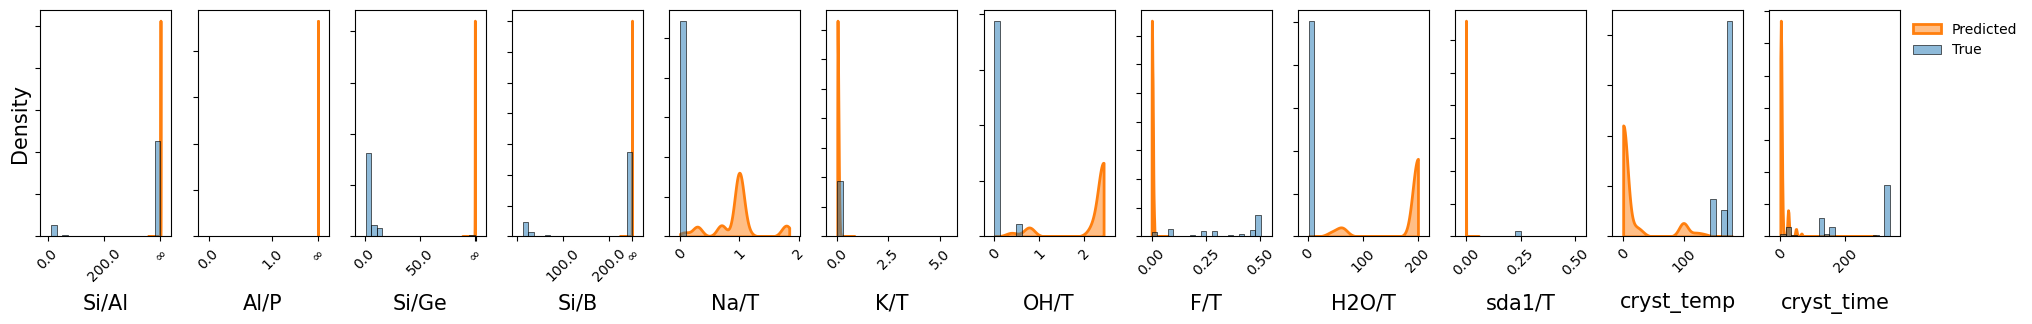

In [9]:
eval_single_system(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, mmd_zeo_agg_df, wsd_zeo_agg_df, mmd_zeo_osda_df, wsd_zeo_osda_df, zeo='BEC')

### B) Zeolite-OSDA system

Calculating metrics for zeolite-OSDA systems...
CHA C[N+](C)(C)C12CC3CC(CC(C3)C1)C2
MMD: 3.7421493530273438
WSD: 0.6440823263205881


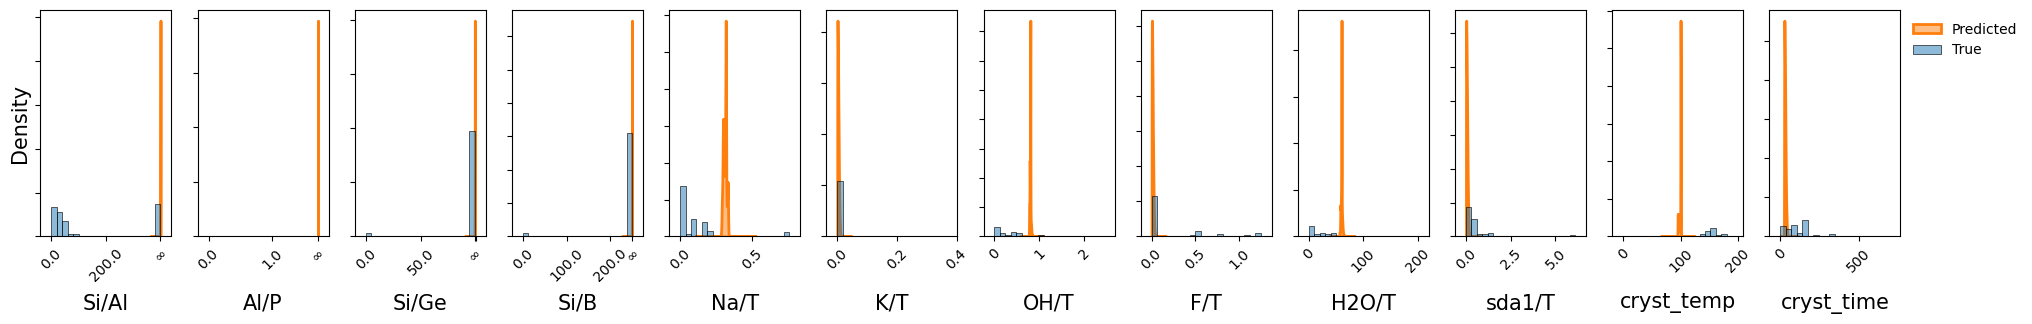

AEL CCCNCCC
MMD: 3.110581874847412
WSD: 0.8282280385009128


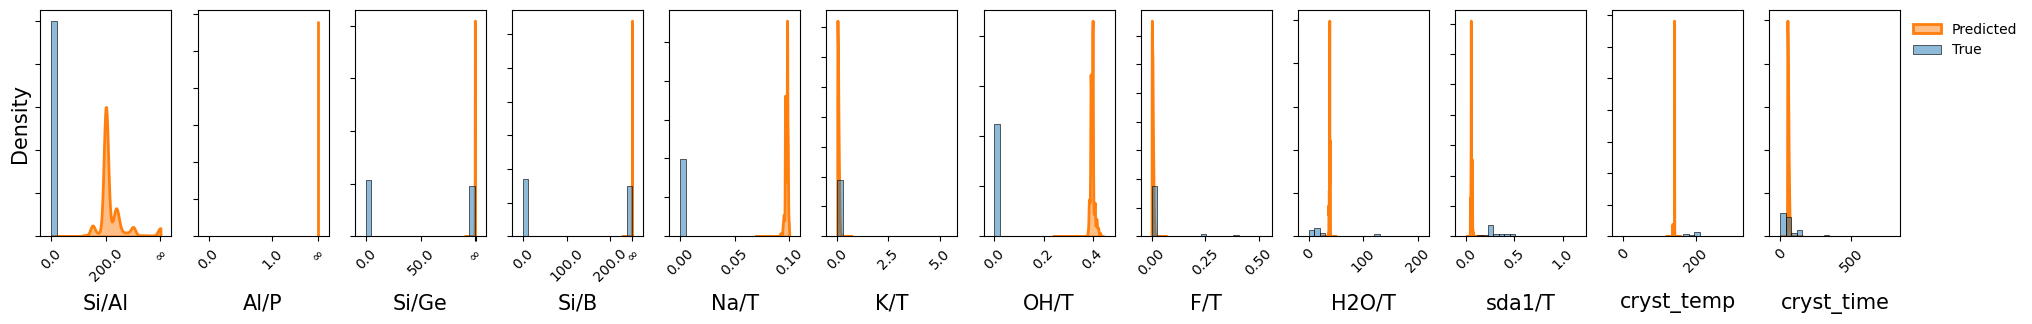

CHA OSDA-free
MMD: 4.9503679275512695
WSD: 1.6122485259749952


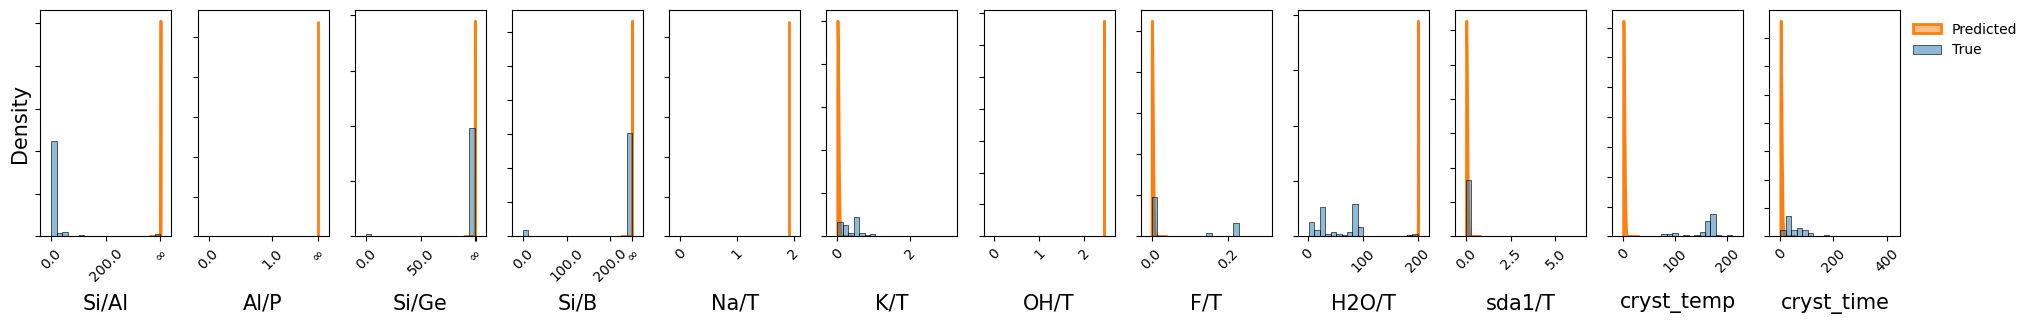

MFI OSDA-free
MMD: 5.173450469970703
WSD: 1.5621963811210797


LinAlgError: singular matrix

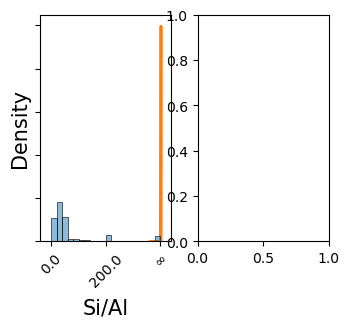

In [10]:
_, _ = eval_zeolite_osda(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, configs, eval=True, plot=True, print_metrics=True, num_systems=None)

CHA C[N+](C)(C)C12CC3CC(CC(C3)C1)C2
MMD: 2.127695083618164
WSD: 0.4150788964477474


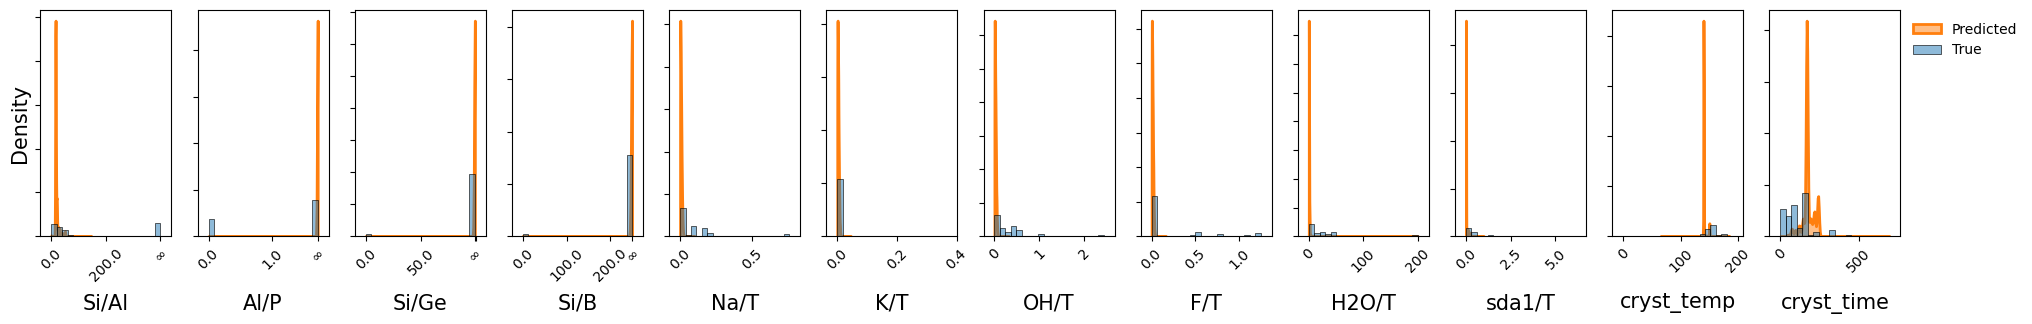

In [ ]:
eval_single_system(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, mmd_zeo_agg_df, wsd_zeo_agg_df, mmd_zeo_osda_df, wsd_zeo_osda_df, zeo='CHA', osda='C[N+](C)(C)C12CC3CC(CC(C3)C1)C2')